In [74]:
!style_transfer sheep_resized.jpg starry_night.jpg sheep_mask_resized.jpg -s 512

Using devices: cuda:0
GPU 0 type: NVIDIA GeForce RTX 4060 Laptop GPU (compute 8.9)
GPU 0 RAM: 8188 MB
Loading model...
Processing content image (128x94)...
target shape current_mask shape torch.Size([1, 512, 11, 16]) torch.Size([1, 3, 94, 128])
Processing style image (128x80)...
Traceback (most recent call last):
  File ~/miniconda3/envs/regionclip/bin/style_transfer:33
    sys.exit(load_entry_point('style-transfer-pytorch', 'console_scripts', 'style_transfer')())
  File ~/style-transfer-pytorch/style_transfer/cli.py:264 in main
    st.stylize(content_img, style_imgs, mask_img, **st_kwargs, callback=callback)
  File ~/style-transfer-pytorch/style_transfer/style_transfer.py:574 in stylize
    loss = opt.step(closure)
  File ~/miniconda3/envs/regionclip/lib/python3.9/site-packages/torch/optim/optimizer.py:385 in wrapper
    out = func(*args, **kwargs)
  File ~/miniconda3/envs/regionclip/lib/python3.9/site-packages/torch/optim/optimizer.py:76 in _use_grad
    ret = func(self, *args, **kwa

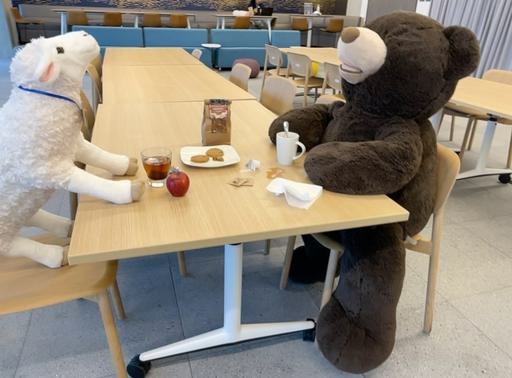

In [37]:
import IPython

from PIL import Image

# Load an image
image_path = 'sheep.jpg'
image = Image.open(image_path)

# Resize the image to 512x512
resized_image = image.resize((512, 378), Image.LANCZOS)
resized_image.save("./sheep_resized.jpg", 'JPEG')
# Show the resized image
IPython.display.Image('sheep_resized.jpg')


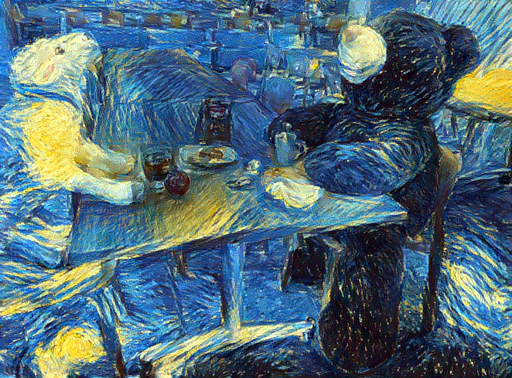

In [7]:
IPython.display.Image('out.png') # 512 x 378

libpng warning: iCCP: known incorrect sRGB profile


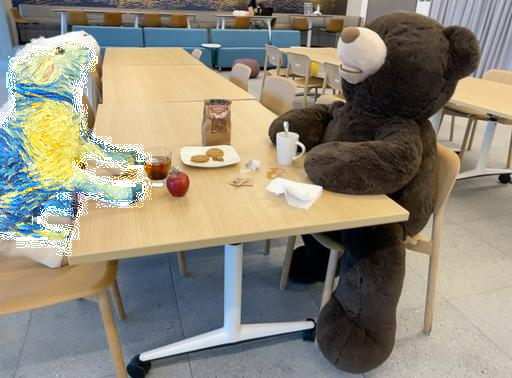

In [114]:
import cv2
import numpy as np
from IPython.display import display, Image
from io import BytesIO
import PIL.Image


image_a = cv2.imread('sheep_resized.jpg')
image_b = cv2.imread('out.png')

mask = cv2.imread('sheep_mask_resized.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (image_a.shape[1], image_a.shape[0]))


masked_area_b = cv2.bitwise_and(image_b, image_b, mask=mask)

inverse_mask = cv2.bitwise_not(mask)
remaining_area_a = cv2.bitwise_and(image_a, image_a, mask=inverse_mask)

# merge 
result_image = cv2.add(remaining_area_a, masked_area_b)

result_image_pil = PIL.Image.fromarray(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))

display(result_image_pil)


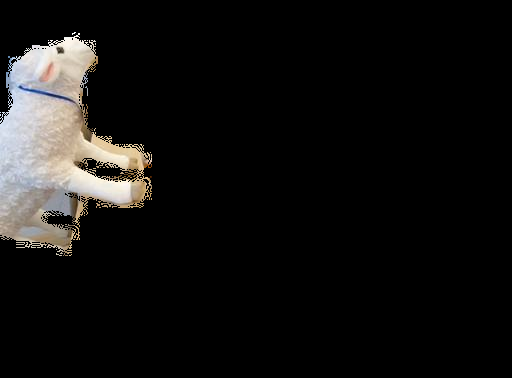

In [115]:
masked_area_a = cv2.bitwise_and(image_a, image_a, mask=mask)
result_image_pil = PIL.Image.fromarray(cv2.cvtColor(masked_area_a, cv2.COLOR_BGR2RGB))
result_image_pil.save("./sheep_resized_maskedOnly.jpg", 'JPEG')

display(result_image_pil)

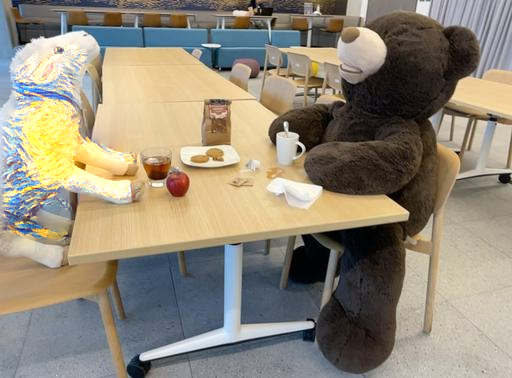

In [116]:


mask = cv2.imread('sheep_mask_resized.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (image_a.shape[1], image_a.shape[0]))

M = cv2.moments(mask)
if M['m00'] != 0:
    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    center = (center_x, center_y)
center = (75, 143)
output = cv2.seamlessClone(image_b, image_a, mask, center, cv2.NORMAL_CLONE)

output_image = PIL.Image.fromarray(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
display(output_image)



(378, 512, 3)


libpng warning: iCCP: known incorrect sRGB profile


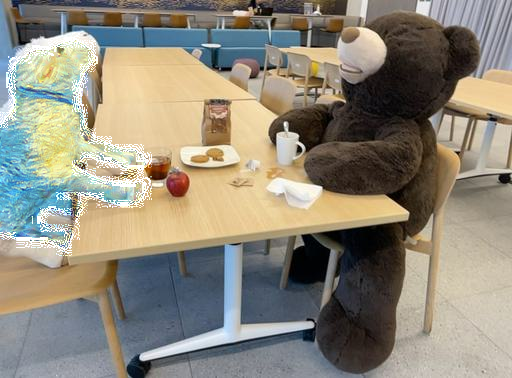

In [118]:
import cv2
import numpy as np
from IPython.display import display, Image
from io import BytesIO
import PIL.Image


image_a = cv2.imread('sheep_resized.jpg')
image_b = cv2.imread('out_maksedOnly.png')
print(image_b.shape)

mask = cv2.imread('sheep_mask_resized.jpg', cv2.IMREAD_GRAYSCALE)


mask = cv2.resize(mask, (image_a.shape[1], image_a.shape[0]))



masked_area_b = cv2.bitwise_and(image_b, image_b, mask=mask)


inverse_mask = cv2.bitwise_not(mask)
remaining_area_a = cv2.bitwise_and(image_a, image_a, mask=inverse_mask)


result_image = cv2.add(remaining_area_a, masked_area_b)


result_image_pil = PIL.Image.fromarray(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))


display(result_image_pil)


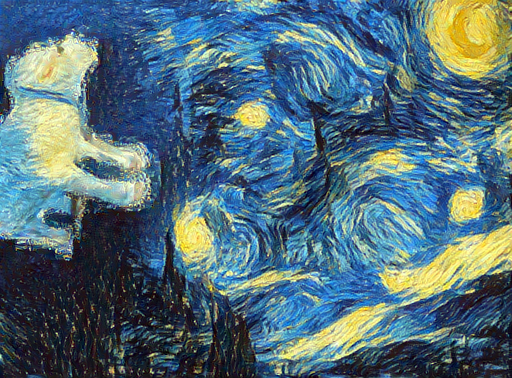

In [119]:
image_b
output_image = PIL.Image.fromarray(cv2.cvtColor(image_b, cv2.COLOR_BGR2RGB))
display(output_image)

libpng warning: iCCP: known incorrect sRGB profile


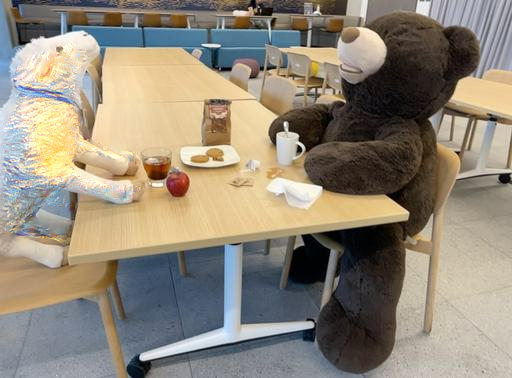

In [112]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image


image_a = cv2.imread('sheep_resized.jpg')
image_b = cv2.imread('out_maksedOnly.png')


mask = cv2.imread('sheep_mask_resized.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (image_a.shape[1], image_a.shape[0]))  

center = (75, 143)


result_image = cv2.seamlessClone(image_b, image_a, mask, center, cv2.NORMAL_CLONE)


result_image_pil = Image.fromarray(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))


display(result_image_pil)